Notebook ilustrativo sobre o Trabalho III. Abaixo temos alguns resultados empíricos sobre a segunda solução para o exemplo do trabalho, bem como as contas da primeira solução. A simulação foi feita de forma similar ao exemplo dado por Lucas Moschen em monitoria, sendo que aproveitei a função draw_samples do notebook mostrado por ele, bem como os plots dos gráficos.

In [1]:
import numpy as np 
from scipy.stats import norm, gamma, t
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def draw_samples(alpha0, beta0, lambda0, mu0, seed = 1000000):

    r = np.random.RandomState(seed)
    tau = r.gamma(shape = alpha0, scale = 1/beta0, size = 10000000)
    mu = r.normal(mu0, scale = np.sqrt(1/(lambda0*tau)))

    return mu, tau

A partir daqui temos as contas dos quatro casos feitos no Trabalho III.

# Contas e Gráficos da Solução

In [3]:
alpha0 = 2
beta0 = 50
mu0 = 10
varmu = 4
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 10
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 12.5
lambda1: 22.5
mu1: 9.247932888888888
alpha1: 7.0
beta1: 61.91904546333612


(7.903138300680498, 10.592727477097279)

Note que os valores dos parâmetros acima foram calculados de acordo com as expressões obtidas no trabalho, ou seja, são os valores teóricos, o mesmo valendo para o intervalo de confiança apresentado acima. Já os gráficos abaixo são todos do resultado do experimento. Nas outras simulações o mesmo ocorre.

In [4]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.39313679659261025
2.0


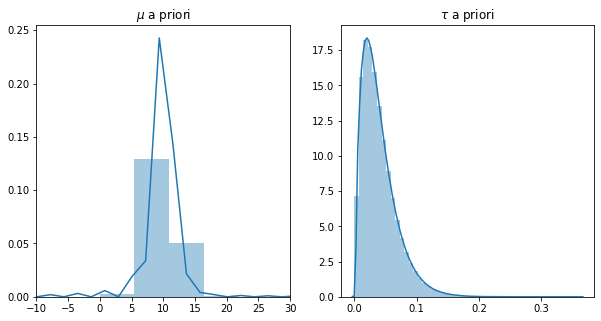

In [5]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((-10,30))
plt.show()

In [6]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.075886222926841, 13.922342231125654)


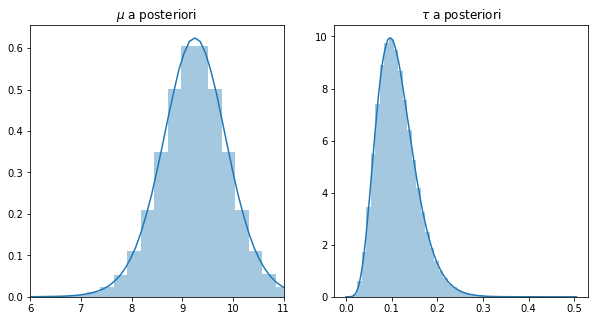

In [7]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((6,11))
plt.show()

In [8]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(7.903907429240891, 10.592530713366)


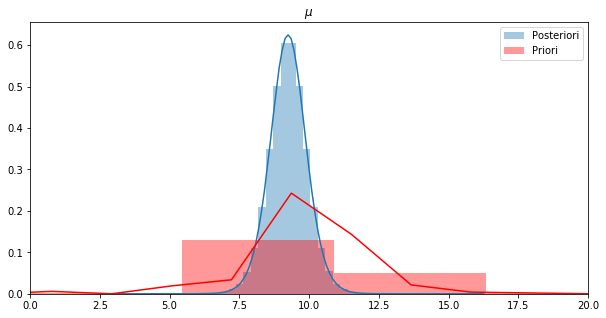

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()

## Fazendo n maior

In [10]:
alpha0 = 2
beta0 = 50
mu0 = 10
varmu = 4
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 100
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 12.5
lambda1: 112.5
mu1: 8.495865777777777
alpha1: 52.0
beta1: 69.87286492667224


(8.279141644407783, 8.71258991114777)

In [11]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.011944079474644827
2.0


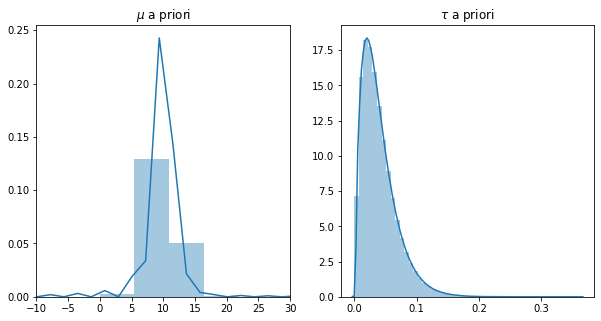

In [12]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((-10,30))
plt.show()

In [13]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.075886222926841, 13.922342231125654)


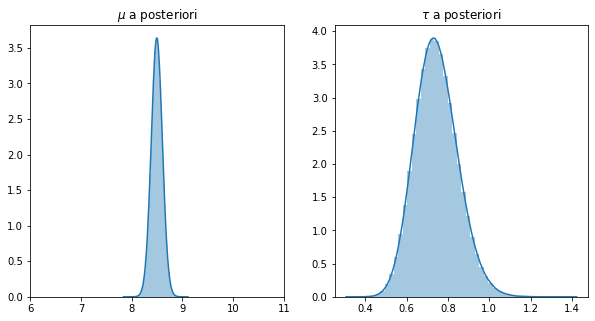

In [14]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((6,11))
plt.show()

In [15]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(8.27916191882495, 8.712498354417194)


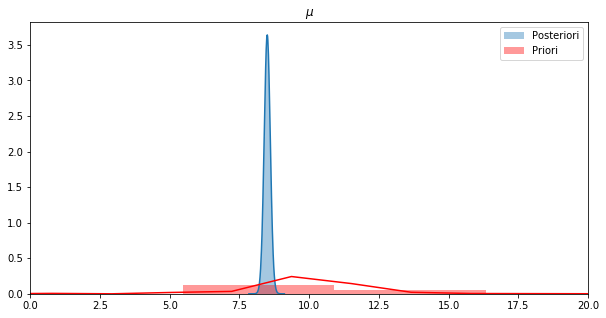

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()

# Alterando o Alpha

In [17]:
alpha0 = 100
beta0 = 2500
mu0 = 10
varmu = 4
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 10
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 6.313131313131313
lambda1: 16.313131313131315
mu1: 8.962706198142413
alpha1: 105.0
beta1: 2509.505812313469


(6.576604381280694, 11.348808015004133)

In [18]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

1.4650807926819014
3.96


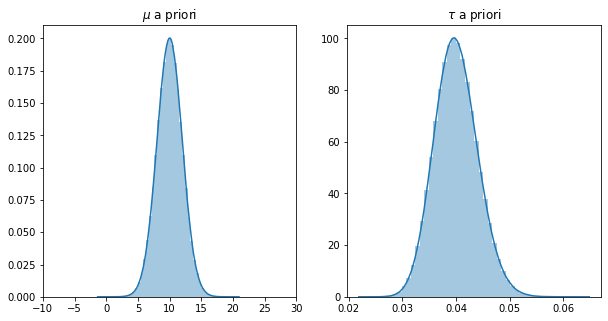

In [19]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((-10,30))
plt.show()

In [20]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.073861578615542, 13.922137654129036)


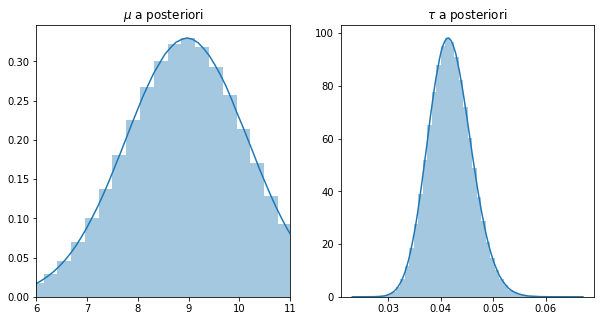

In [21]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((6,11))
plt.show()

In [22]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(6.575382306854184, 11.347026481789838)


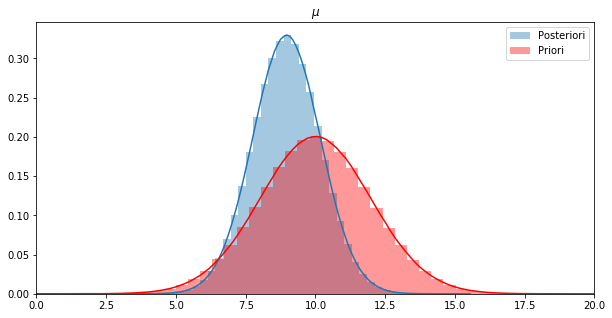

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()

# Alpha 100 com n = 100

In [24]:
alpha0 = 100
beta0 = 2500
mu0 = 10
varmu = 4
lambda0 = beta0/(varmu*(alpha0 - 1))
print("lambda0:", lambda0)

xbar = 8.307849
n = 100
sn = 7.930452

lambda1 = lambda0 + n
mu1 = (lambda0*mu0 + n*xbar)/(lambda0 + n)
alpha1 = alpha0 + n/2
beta1 = beta0 + sn/2 + (n*lambda0*(xbar - mu0)**2)/(2*(n + lambda0))
print("lambda1:", lambda1)
print("mu1:", mu1)
print("alpha1:", alpha1)
print("beta1:", beta1)

lower = mu1 - (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)
upper = mu1 + (beta1/(alpha1*lambda1))**(1/2)*t.ppf(0.5+0.5*0.95, df = 2*alpha1)

(lower, upper)

lambda0: 6.313131313131313
lambda1: 106.31313131313131
mu1: 8.408333026128266
alpha1: 150.0
beta1: 2512.466933264848


(7.627218376206532, 9.189447676050001)

In [25]:
# para fazer o tikz

print(beta1/(alpha1*lambda1))
print(beta0/(alpha0*lambda0))

0.15755137063703561
3.96


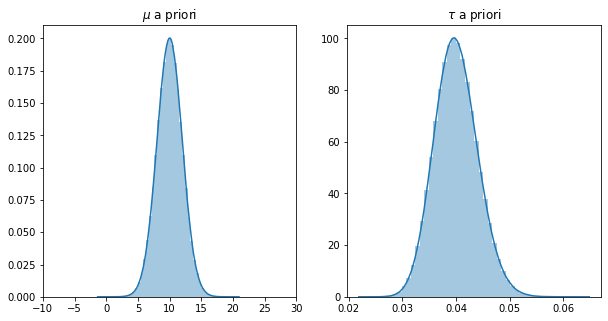

In [26]:
mu_samples, tau_samples = draw_samples(alpha0, beta0, lambda0, mu0)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples, ax = ax[0])
sns.distplot(tau_samples, ax = ax[1])
ax[0].set_title(r'$\mu$ a priori')
ax[1].set_title(r'$\tau$ a priori')
ax[0].set_xlim((-10,30))
plt.show()

In [27]:
ci_mu = (np.quantile(mu_samples, 0.025), np.quantile(mu_samples, 0.975))
print(ci_mu)

(6.073861578615542, 13.922137654129036)


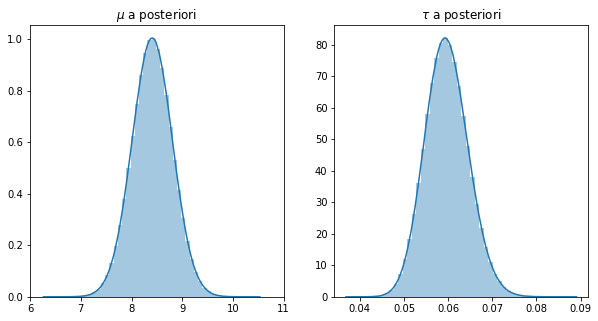

In [28]:
mu_samples_post, tau_samples_post = draw_samples(alpha1, beta1, lambda1, mu1)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax[0])
sns.distplot(tau_samples_post, ax = ax[1])
ax[0].set_title(r'$\mu$ a posteriori')
ax[1].set_title(r'$\tau$ a posteriori')
ax[0].set_xlim((6,11))
plt.show()

In [29]:
ci_mu = (np.quantile(mu_samples_post, 0.025), np.quantile(mu_samples_post, 0.975))
print(ci_mu)

(7.627144728442146, 9.188973629725858)


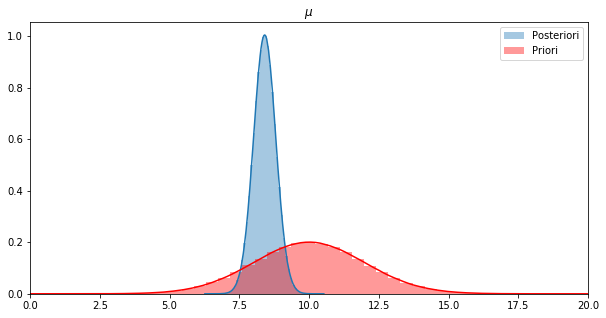

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(mu_samples_post, ax = ax, kde = True, label = 'Posteriori')
sns.distplot(mu_samples, ax = ax, kde = True, label = 'Priori', color = 'red')
ax.set_title(r'$\mu$')
ax.set_xlim((0,20))
ax.legend()
plt.show()